In [4]:
import pandas as pd # pandas dataframe library
import numpy as np #mathmatical library will use in large array, linear algebra
from matplotlib import pyplot as plt#data visual library

In [9]:
df = pd.read_excel("Height-Width.xlsx")
x = df[['Height']]
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [11]:
y = df['Weight']
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.3 ,random_state=5)

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [15]:
m = reg.coef_

In [16]:
m

array([6.00809929])

In [17]:
c = reg.intercept_
c

-227.77595602223423

In [18]:
reg.predict(xtest)

array([156.22895255, 171.26045447, 186.87942774, ..., 205.60020285,
       186.14253731, 219.24585226])

In [19]:
pred = reg.predict(xtest)
pred

array([156.22895255, 171.26045447, 186.87942774, ..., 205.60020285,
       186.14253731, 219.24585226])

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(ytest,pred)
mse

102.60138482843213

In [21]:
mae = mean_absolute_error(ytest,pred)
mae

8.061150778858023

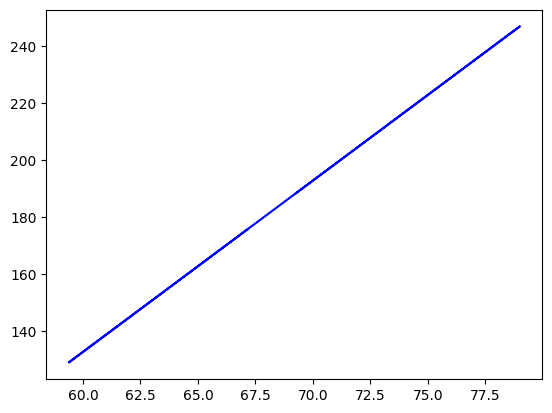

In [22]:
plt.plot(xtrain,reg.predict(xtrain),color="blue")

In [23]:
import pickle as pk
import joblib as jb

In [26]:
pk.dump(reg,open("Height-Width2","wb"))

In [27]:
reg2 = pk.load(open("Height-Width2","rb"))

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
jb.dump(reg,"Second")

['Second']